# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [8]:
# Extract all rows of data
table = soup.find('table', class_="table")
heading_rows = table.find_all("th")
data_rows = table.find_all("tr", class_="data-row")

In [9]:
heading_rows

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
mars_data = []
del mars_data[:]

# Loop through the scraped data to create a list of rows
for row in data_rows:
    row_data = row.find_all("td")
    values = []
    for value in row_data:
        values.append(value.text)
    mars_data.append(values)
mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data)
mars_df.columns = [heading.text for heading in heading_rows]


In [13]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date, dayfirst=True)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

C:\Users\Harry\AppData\Local\Temp\ipykernel_22964\3414349446.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date, dayfirst=True)


In [17]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
mars_df["month"].max()

12

In [20]:
# 2. How many sols (Martian days) worth of data are there?
mars_df["sol"].count()

1867

In [21]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
average_min_temp_by_month 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

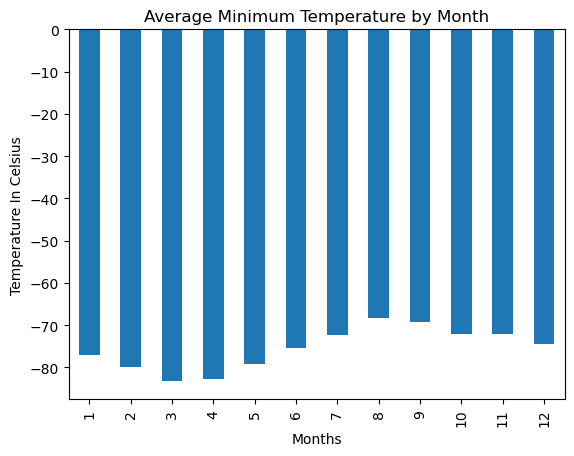

In [22]:
# Plot the average minimum temperature by month
average_min_temp_by_month.plot.bar()
plt.xlabel("Months")
plt.ylabel("Temperature In Celsius")
plt.title("Average Minimum Temperature by Month")
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = average_min_temp_by_month.sort_values()
sorted_avg_min_temp_by_month

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

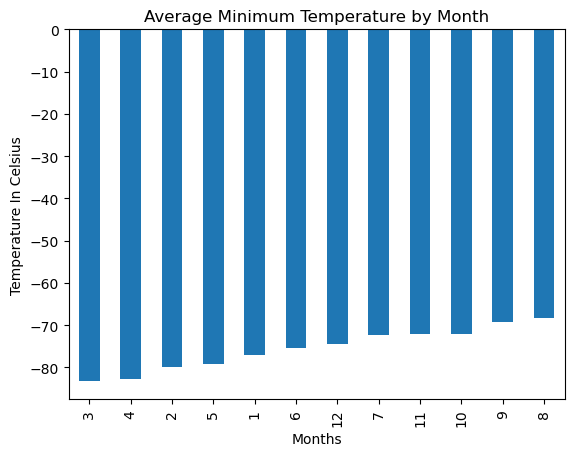

In [24]:
sorted_avg_min_temp_by_month.plot.bar()
plt.xlabel("Months")
plt.ylabel("Temperature In Celsius")
plt.title("Average Minimum Temperature by Month")
plt.show()

In [25]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby("month")["pressure"].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

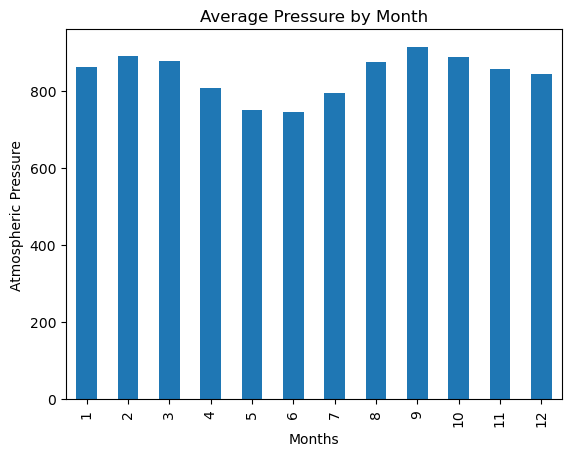

In [26]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar()
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [27]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()
sorted_avg_pressure_by_month

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

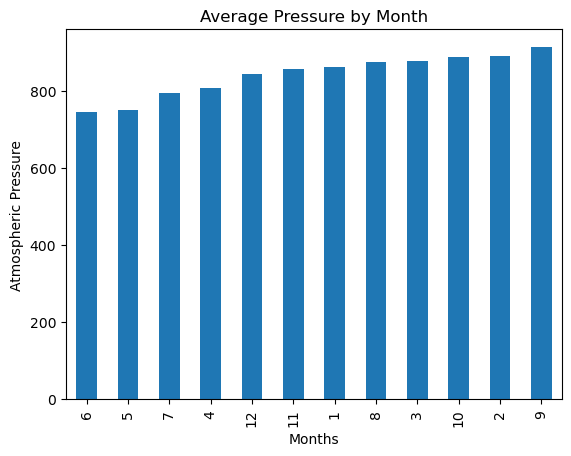

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month.plot.bar()
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [29]:
# Data begins on 2012-08-16 and has a solar longitude(ls) of 155
# Each year will result in a ls that is 360 degrees from the starting date
# In order to calculate how many earth days elapse in this 360 degrees, 
# we will find the next time ls is at 155 and calculate the difference in terrestrial_dates
date_sorted_df = mars_df.sort_values(by='terrestrial_date')
date_sorted_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [30]:
# From this table we can see that the intervals between 155 ls is:
# 2012-08-16 to 2014-07-03 and 2014-07-04 to 2016-05-20
interval_data = mars_df.loc[mars_df["ls"] == 155]
interval_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [31]:
# Testing difference in first interval 2012-08-16 to 2014-07-03: Result 686 days
start_date1 = interval_data.iloc[0, 1]
end_date1 = interval_data.iloc[1, 1]
days_difference1 = (end_date1 - start_date1)
days_difference1

Timedelta('686 days 00:00:00')

In [32]:
# Testing difference in first interval 2014-07-04 to 2016-05-20: Result 686 days
start_date2 = interval_data.iloc[2, 1]
end_date2 = interval_data.iloc[3, 1]
days_difference2 = (end_date2 - start_date2)
days_difference2

Timedelta('686 days 00:00:00')

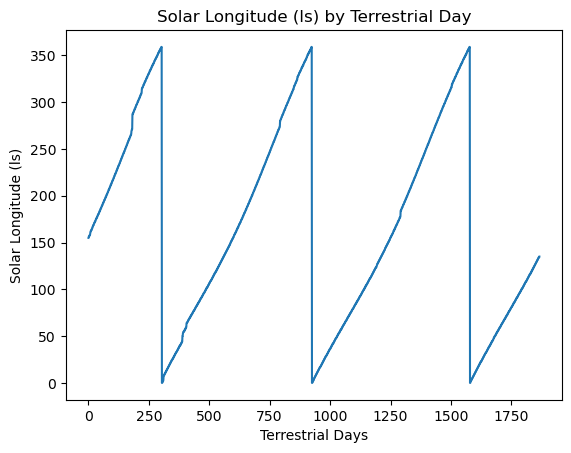

In [33]:
# By plotting this data, we can visually see this change in ls at these intervals to support the data.
mars_df["ls"].plot()
plt.xlabel("Terrestrial Days")
plt.ylabel("Solar Longitude (ls)")
plt.title("Solar Longitude (ls) by Terrestrial Day")
plt.show()

In [34]:
# 2 consecutive times, 686 earth days passed before ls reached 155 again. 
# Therefore, we can estimate that 686 earth days = 1 year on mars.
# If we assume seasons on mars also follow similar temperatures each year, we can use another visualization to estimate
# The graph below also visually demonstrates this by showing the start and end patters of minimum temperature over the number of terrestrial days
# We can see that at day 0 the temperature is roughly -77.5 before trending upwards
# This pattern is similar in a value between 500 - 750 terrestrial days
# From that same point, the patter begins again just after 1250 terrestrial days.
# The graph is more difficult to read for exact days, but it supports our hypthoses of roughly 688 days.

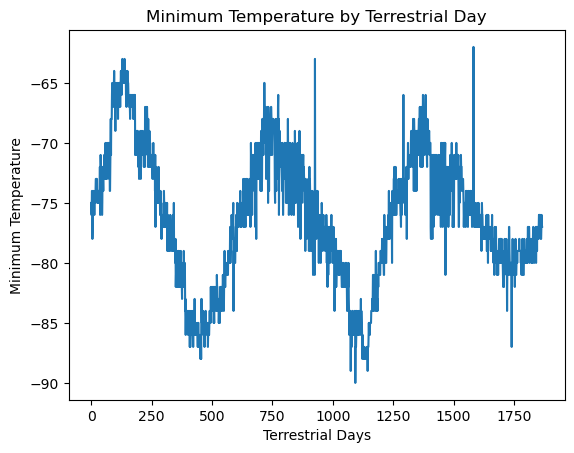

In [35]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# ANSWER ---------------> About 688 days

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df["min_temp"].plot()
plt.xlabel("Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature by Terrestrial Day")
plt.show()

#### Minimum Temperature

On average, the 3rd month is usually the coldest with a mean value of -83.307292. The 8th month is usually the warmest with a mean value of -68.382979

#### Atmospheric Pressure

On average, the 6th month has the lowest pressure with a mean value of 745.05. The 9th month is the highest at a mean value of 913.31.

#### Year Length

1 mars year is equal to roughly 688 days according to this analysis. This analysis was done by comparing solar longitude doing a complete 360 cycle. Doing an online search confirmed that the value is 687 earth days. 
<br>See section for more detailed analysis.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv", index = False)

In [41]:
browser.quit()